# IS 362 – Week 8 Assignment
## Cristian Cajas


Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. Here is a link to the “Auto MPG” dataset in the UC Irvine data repository:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

    1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
    2. Review the data and the provided data set description.
    3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
    4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
    5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
    6. Create a bar chart that shows the distribution for cylinders.
    7. Create a scatterplot that shows the relationship between horsepower and weight.
    8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

In [14]:
# show the plots inside this notebook
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
#set some pandas options controling output format
pd.set_option('display.notebook_repr_html',True) # output as flat text and not HTML
pd.set_option('display.max_rows', None) # this is the maximum number of rows we will display
pd.set_option('display.max_columns', None) # this is the maximum number of rows we will display

In [15]:
# Part 1:
# read the space seperated expression I used the following argument:
#     delim_whitespace=True
# set the delimiter to whitesace
mpg = pd.read_csv("data/auto-mpg.data", header=None, delim_whitespace=True)

# I could also have used the sep argument and set it to '\s+' as demonstrated below:
#     mpg = pd.read_csv("data/auto-mpg.data", header=None, sep='\s+')

In [16]:
# Part 2
# display the first 5 rows of data and the column names
mpg.head(5)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
# Part 3:
# rename the column headers using the information in the auto-mpg.names file
mpg.rename(columns={0: 'mpg', \
                    1: 'cylinders', \
                    2: 'displacement', \
                    3: 'horsepower', \
                    4: 'weight', \
                    5: 'acceleration', \
                    6: 'model_year', \
                    7: 'origin', \
                    8: 'car_name',}, inplace=True)

# Part 4.a.:
# replace '?' in the horsepower column with NaN
mpg.horsepower.replace('?', np.nan, inplace=True)

# Part 4.b.:
# change the horsepower column to float
mpg.horsepower = mpg.horsepower.astype(np.float)

# Display the column datatypes, to review the new column datatype
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [18]:
# Part 5:
# Relplace, the 1, 2, and 3 values in the origin column with 'USA', 'Asia', and 'Europe' respectively
mpg.origin.replace([1,2,3], ['USA','Asia','Europe'], inplace=True)

# Display the dataframe with the changes that were made
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA,amc ambassador dpl


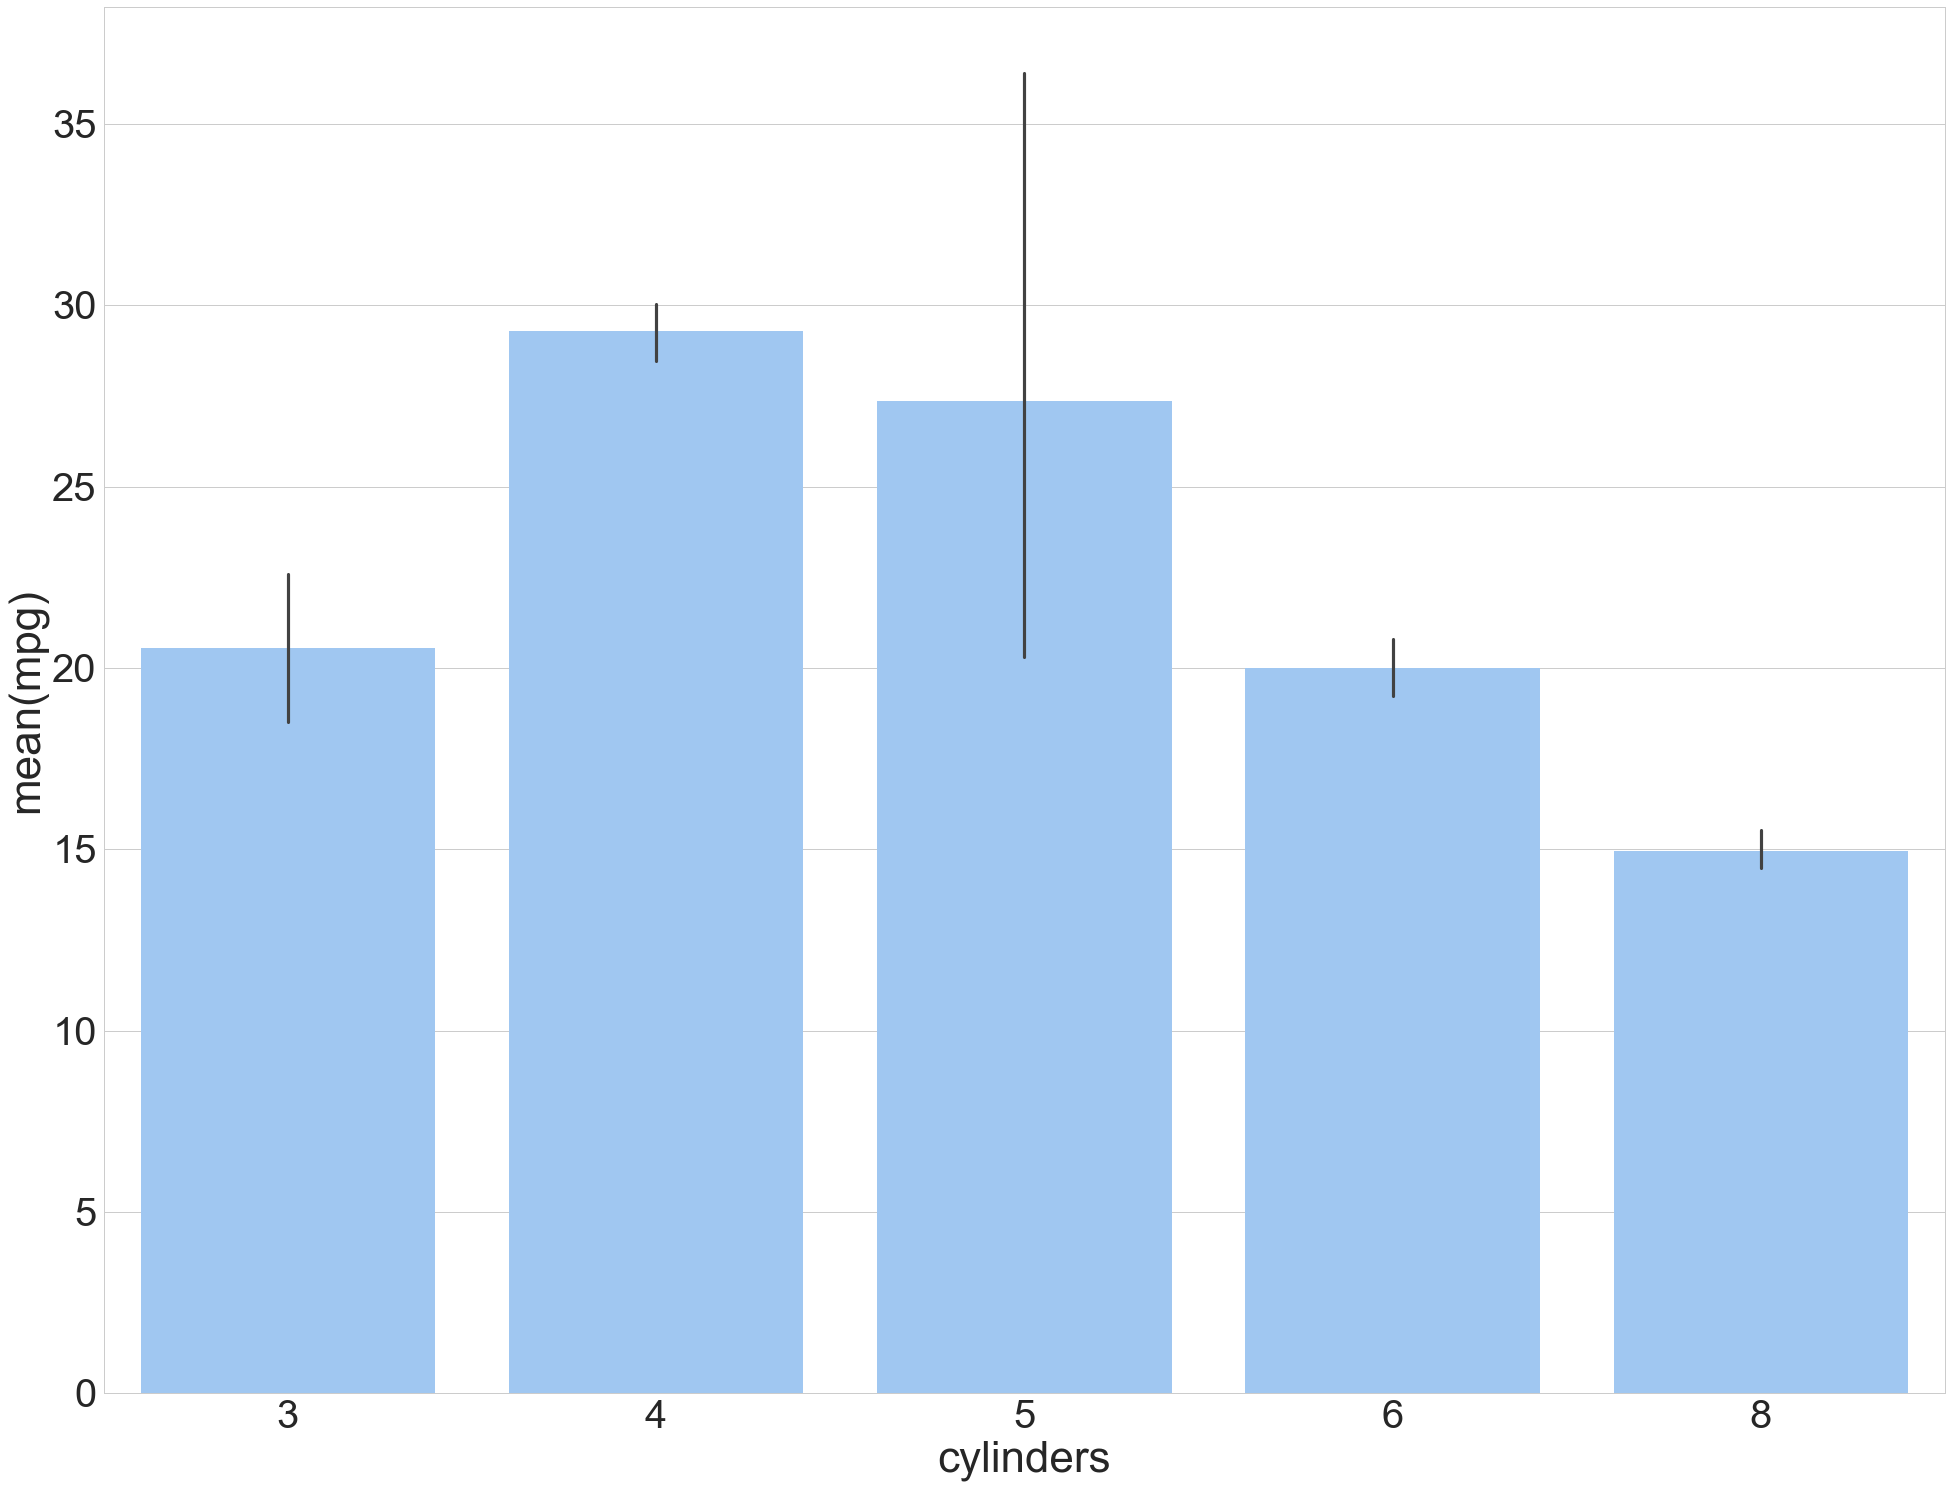

In [19]:
# Part 6:
# Set the seaborn grid type to whitegrid. Whitegrid displays sightlines, font_scale set the font size.
sns.set(style='whitegrid',font_scale=4)

# Use pleasent pastel colors in our plot
sns.set_color_codes('pastel')

# change the plotsize to 11" x 3, by 8.5" * 3
fig, ax = plt.subplots(figsize=(33, 25.5))
# display a barchart that shows the average MPG by cylinder number.
sns.barplot(x='cylinders', y='mpg', data=mpg, label='MPG by Cylinder', color='b')
# save the figure
fig.savefig('Output/MPG and Cylinders.pdf')

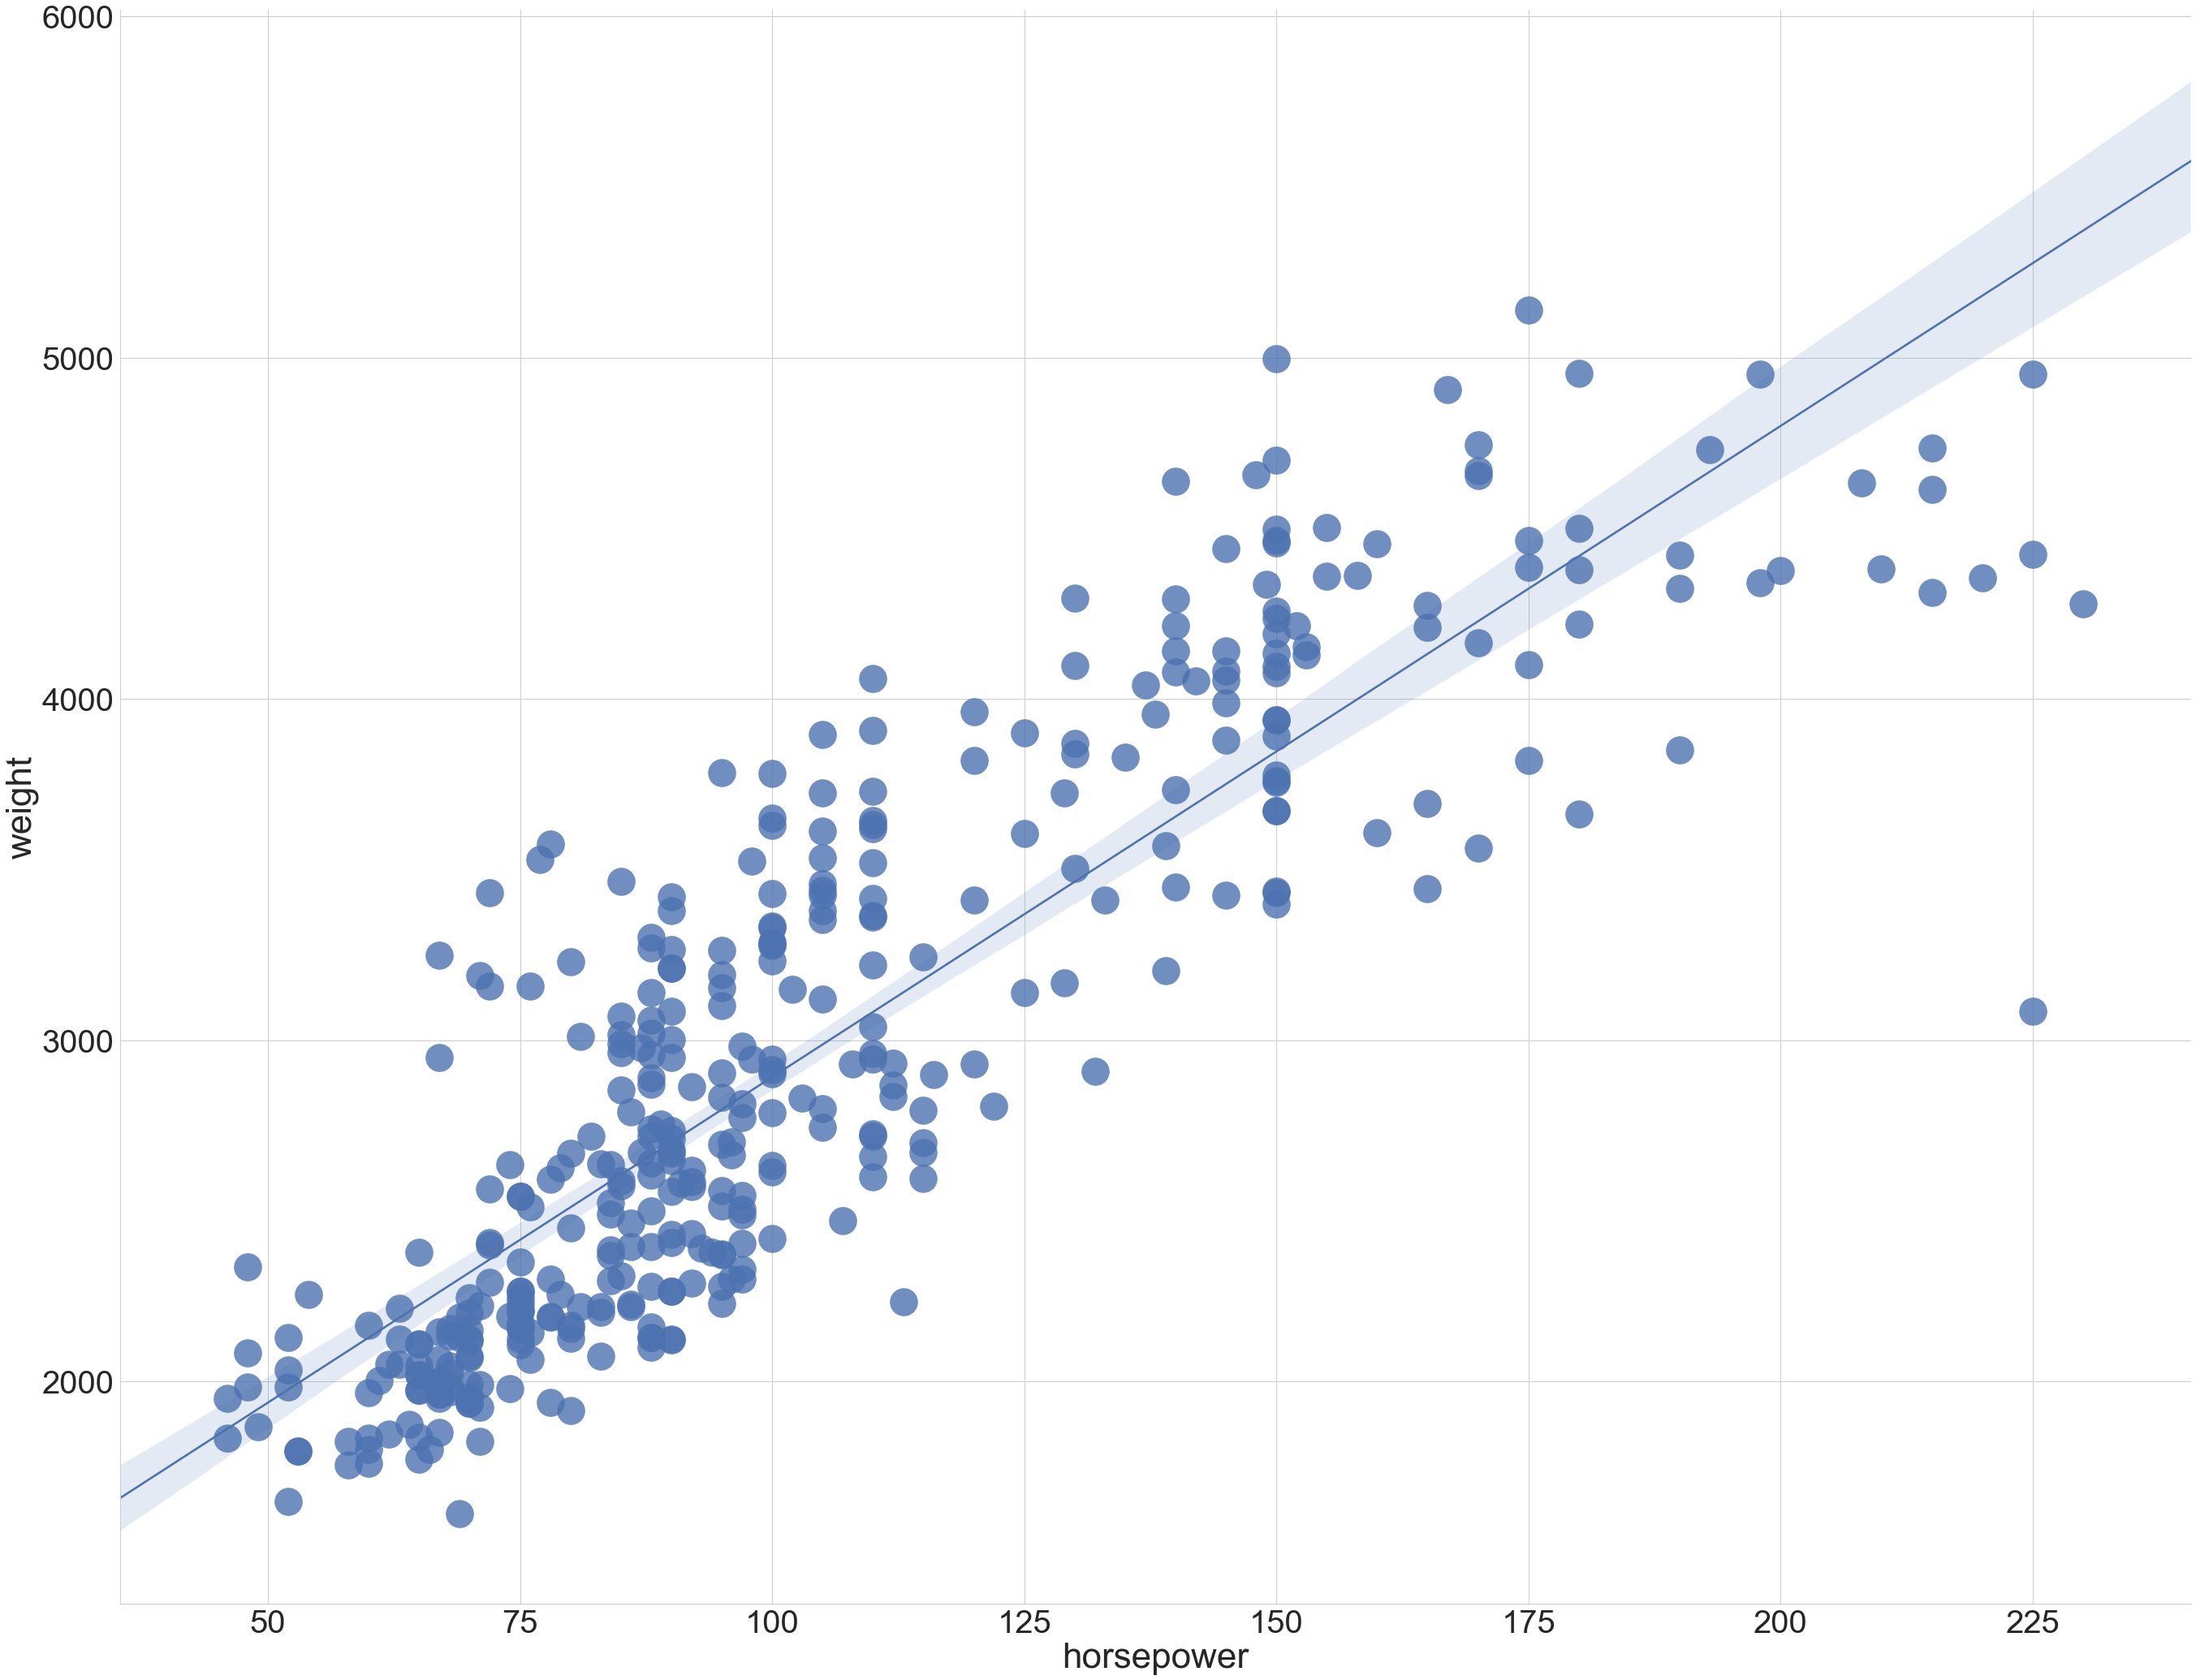

In [20]:
# Part 7:
# Create a scatterplot that shows the relationship between horsepower and weight.
# set style and fontsize
sns.set(style='whitegrid',font_scale=4) 

# 1. Create the scatterplot
# 2. set it to an aspect ratio of 8.5 x 11
# 3. Make it large enough to print
# 4. Save it as a pdf for printing
sns.lmplot('horsepower', 'weight', data=mpg, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('Output/Displacement v Weight.pdf')

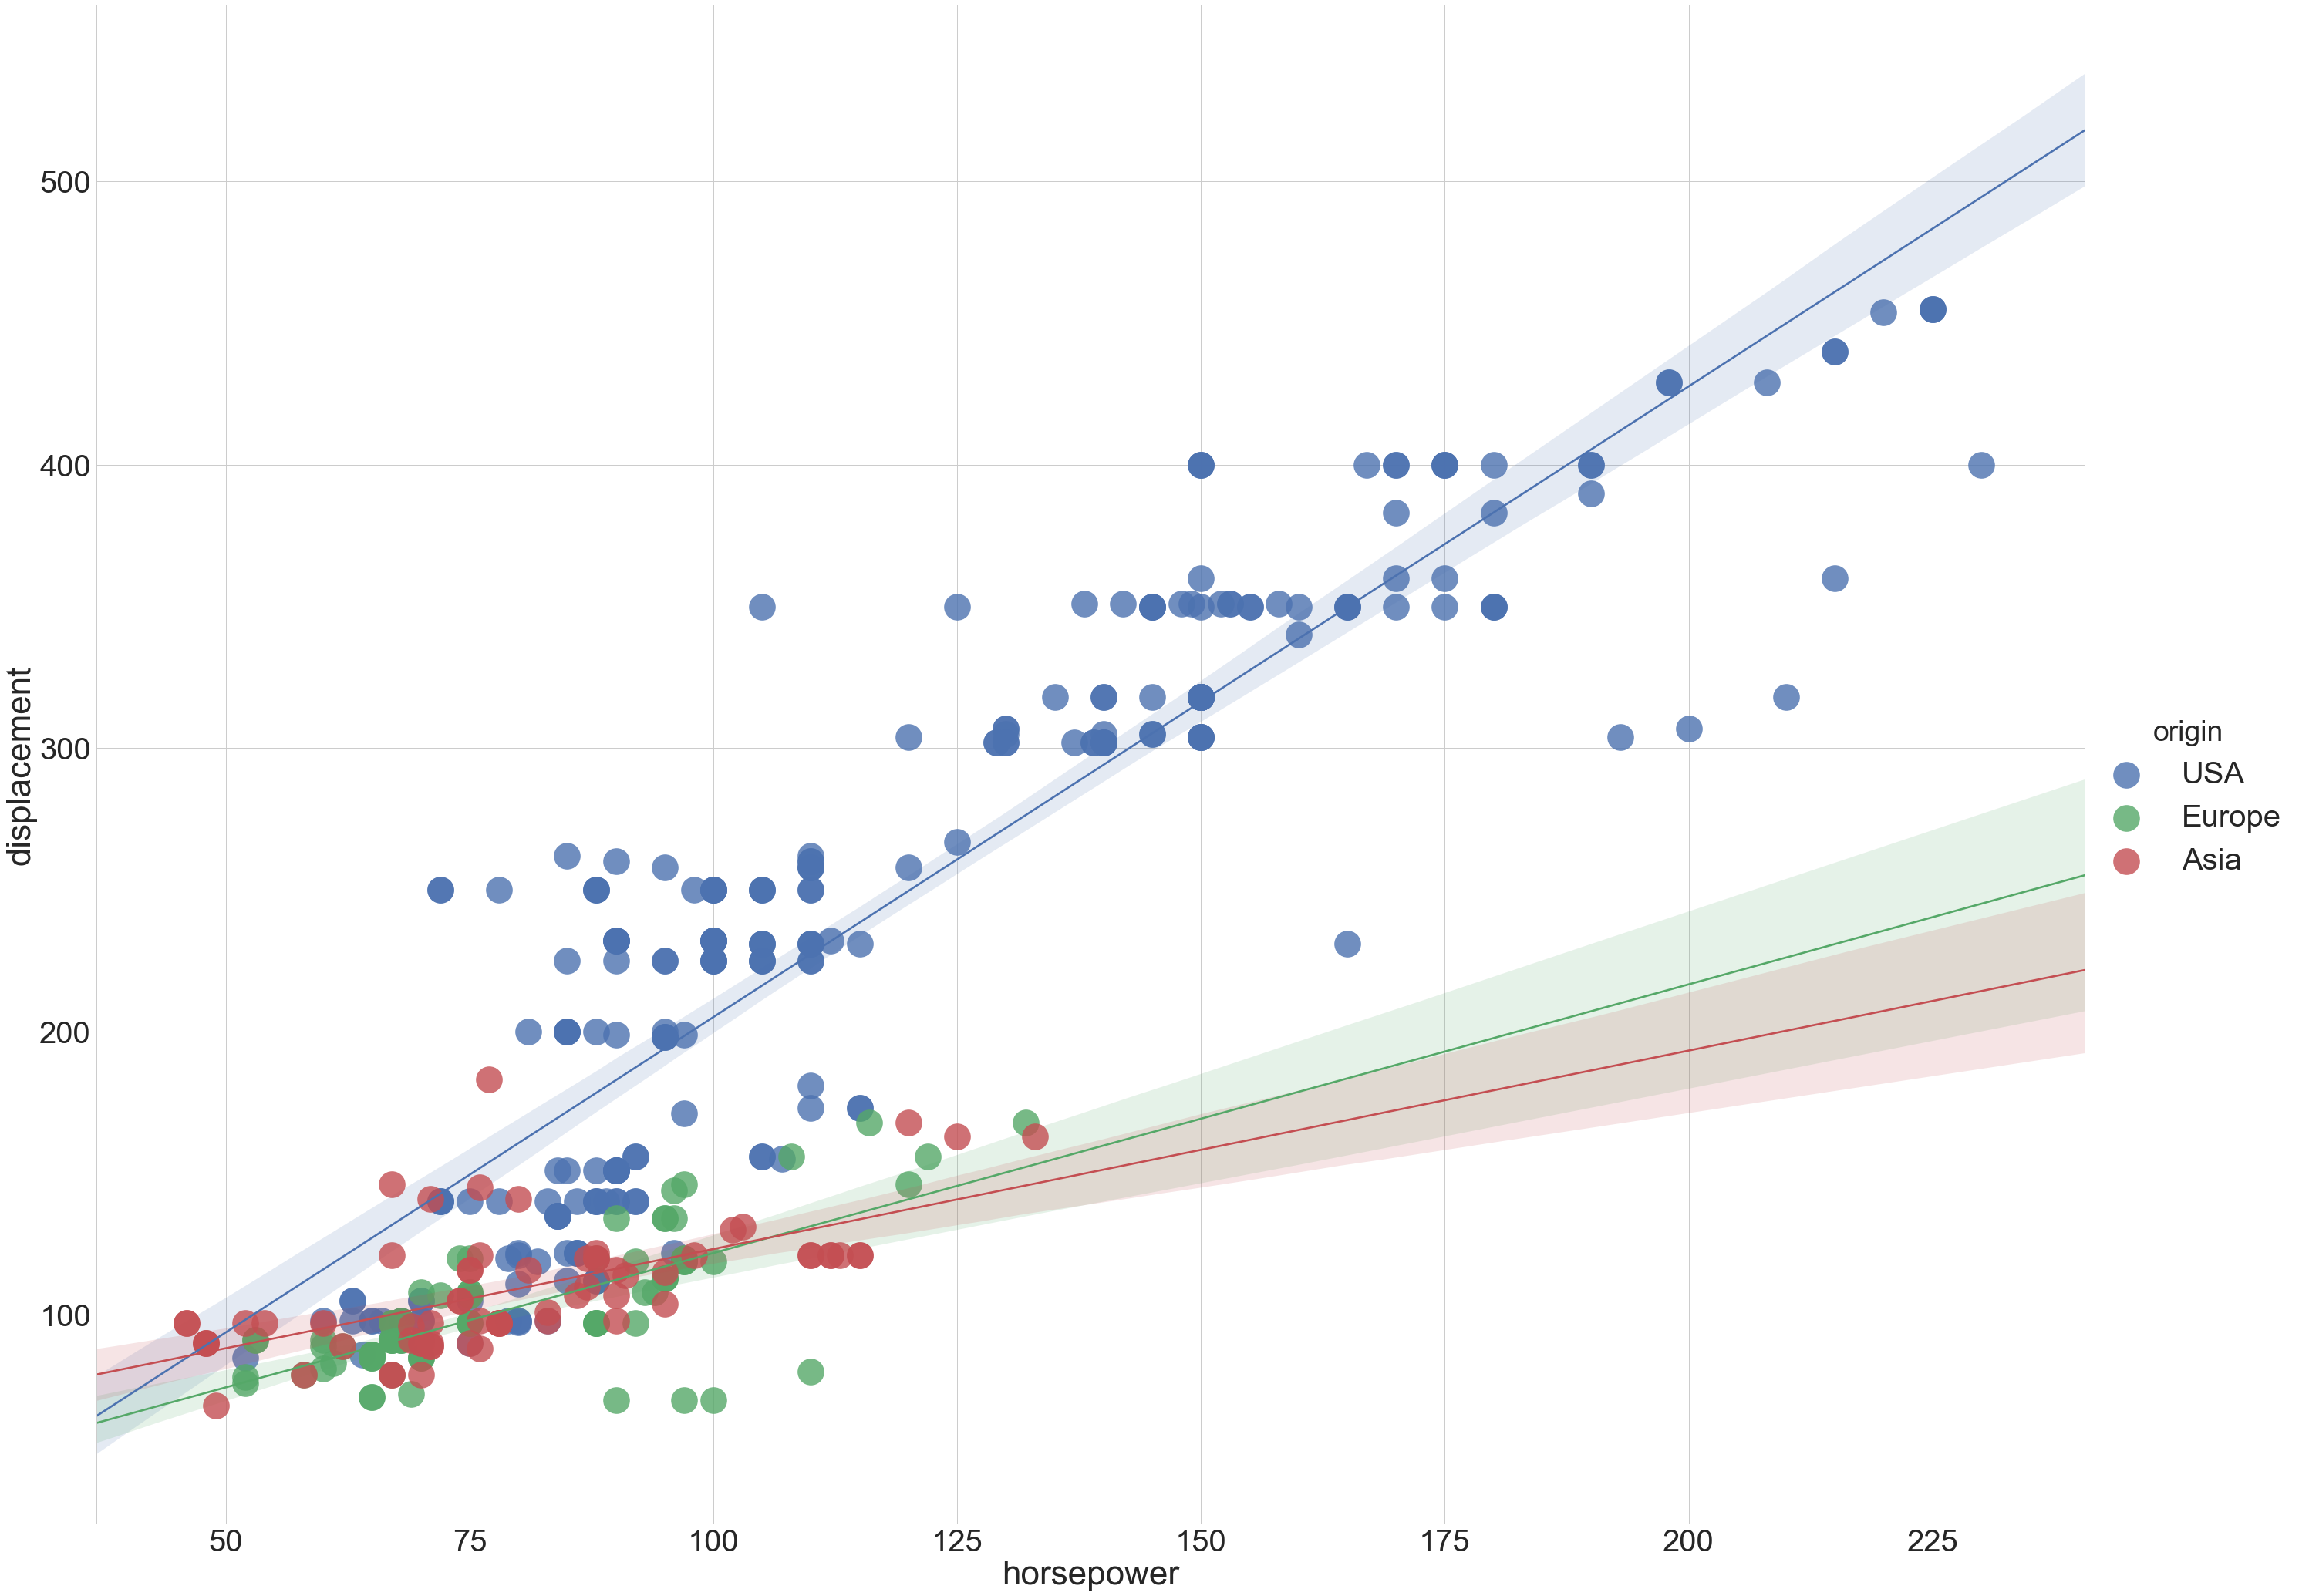

In [21]:
# Part 8: 
# Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting
# question about the distribution of one of the variables, or the relationship between 
# two (or more!) of the variables in the “Auto MPG” dataset.

# create a scatter plot that shows the relationship between engine displacent volume and 
# horsepower. Color the data by origin. Also export the plot as a pdf file for printing.
sns.set(style='whitegrid',font_scale=4)
sns.lmplot('horsepower', 'displacement', data=mpg, hue='origin', size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('Output/Displacement v Horsepower.pdf')